#  Where job satisfaction is highest ?





## Business Understanding

In this project, I choose [Stack Overflow data](https://www.kaggle.com/stackoverflow/so-survey-2017/data) from 2017 and I will focus to find out:

* Should a programmer go to in the western world or remain in the eastern world for job.
* Salary difference betreen western world and the eastern world.
* Satisfaction of the programmer about their job between these two sides of the world.
* Find jobs opportunity facility in the western world and eastern world.


In [329]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Data Understanding

I will first give an overview of the data. For example, what type of developers are they and where are they from? Also take a look at what you think about their employment status and your salary.



In [330]:
#Read the data and glimpse it
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
# Data Understanding
def display_bar_chart(df, column, title):
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar", color = 'darkorange');
    plt.title(title);

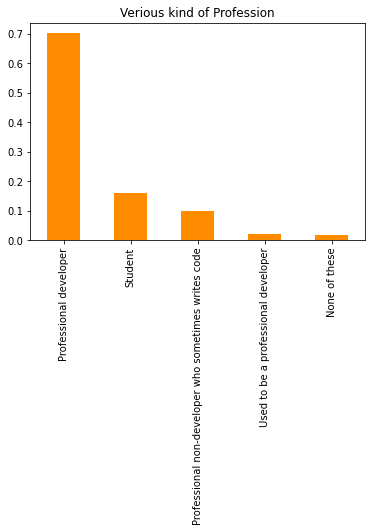

In [332]:
# Find each Professional status
display_bar_chart(df, "Professional", "Verious kind of Profession")

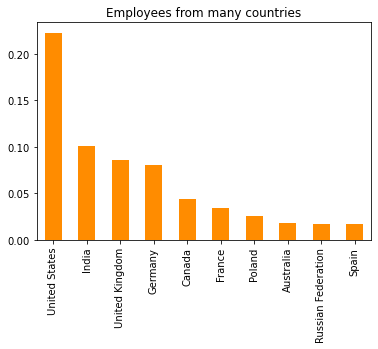

In [333]:
# Find each Country where they come from.
display_bar_chart(df, "Country", "Employees from many countries")

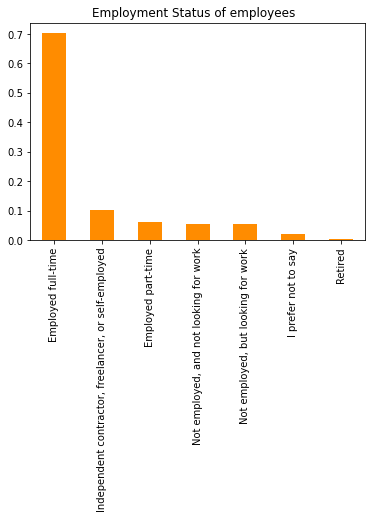

In [334]:
# Find each Employment status
display_bar_chart(df, "EmploymentStatus", "Employment Status of employees  ")

##  Data preparation

#### In this section of the report, we will check for cleanliness,we will trim and clean our dataset for analysis.

The categorized variable “Country” divides them into three sectors: West, East, and others. The following code define the lists of related countries and create a new column to identify whether that person lives in the west or in the east.

In [335]:
def handling_country(df):
    # For Categorical variables "Country", we seperate them into 
    # three sessions: western, eastern and other
    # The following lists define the countries to western and eastern
    western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 'Germany',
           'Ireland', 'Canada', 'United Kingdom',  
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam' 'Bangladesh']
    
    # Creat a new catagory for western and eastern
    df['west_or_east'] = df['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))
    
    return df

#### Here we select some useful columns for our analysis:
* Country: Their living Country.
* YearsCodedJob: Years they are coding.
* EmploymentStatus: Their employment status.
* Salary: Their Salary.
* JobSatisfaction & CareerSatisfaction: Satisfaction of their job and career.

#### We are mainly focus on full-time professional developers.

In [336]:
def data_preparation(df):
    # Creat some useful columns for analysis
    useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'west_or_east']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

Now we creat a group of dataframe by west_or_east and YearsCodedJob, and get their mean, it automatically ignore the null value.

.

In [337]:
# Creat some useful columns for analysis
df = handling_country(df)
useful_df = data_preparation(df)
comparison = useful_df.groupby(['west_or_east','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  \
west_or_east YearsCodedJob                                           
eastern      1 to 2 years                6.624719         5.887640   
             10 to 11 years              7.500000         6.550000   
             11 to 12 years              7.382353         6.852941   
             12 to 13 years              7.176471         6.088235   
             13 to 14 years              7.333333         7.666667   
...                                           ...              ...   
western      6 to 7 years                7.644114         7.177267   
             7 to 8 years                7.532209         7.179724   
             8 to 9 years                7.558304         7.072438   
             9 to 10 years               7.476000         6.988000   
             Less than a year            7.811526         7.648438   

                               HoursPerWeek        Salary  
west_or_east YearsCodedJob                                 
eastern      1 to 2 years          5.653696   7742.553472  
             10 to 11 years        3.720000  33318.461069  
             11 to 12 years        3.714286  41902.774227  
             12 to 13 years        4.937500  53430.910772  
             13 to 14 years       26.000000  50170.185287  
...                                     ...           ...  
western      6 to 7 years          2.211039  69648.807261  
             7 to 8 years          2.138060  70236.572056  
             8 to 9 years          2.096491  76314.628263  
             9 to 10 years         2.148026  74142.281505  
             Less than a year      1.818627  47639.855006  

[63 rows x 4 columns]

Frpm the above table the categorical variable 'YearsCodedJob', we transfer it to a calculable integer value because we want to know the average of the duration during which they were coded. 

## Results Evaluation

#### In this section, we will show the findings and discuss about it.



west_or_east
eastern     628.413503
other       743.057045
western    1529.287081
Name: Salary, dtype: float64

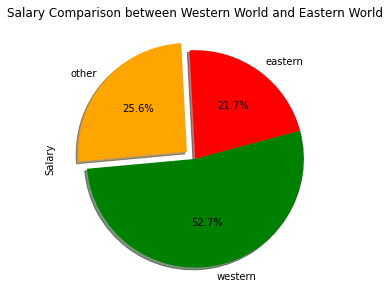

In [338]:
plt.figure(figsize=(12,5))
comparison_graph.groupby('west_or_east').mean()['Salary'].plot(kind='pie',title='Salary Comparison between Western World and Eastern World',autopct='%1.1f%%', startangle=15, shadow = True, colors=['red','orange','green'], explode=my_explode )
comparison.groupby('west_or_east').mean().Salary/50

west_or_east
eastern    5.053338
other      2.634922
western    2.103156
Name: HoursPerWeek, dtype: float64

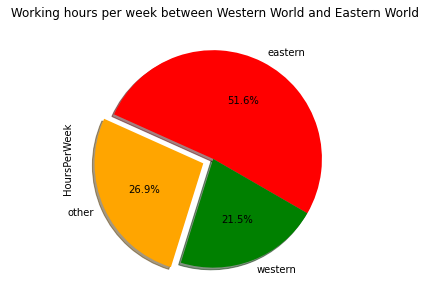

In [339]:
plt.figure(figsize=(12,5))
comparison_graph.groupby('west_or_east').mean()['HoursPerWeek'].plot(kind='pie',title=' Working hours per week between Western World and Eastern World',autopct='%1.1f%%', startangle=330, shadow = True, colors=['red','orange','green'], explode=my_explode )
comparison.groupby('west_or_east').mean().HoursPerWeek

west_or_east
eastern    7.122798
other      7.502185
western    7.576207
Name: CareerSatisfaction, dtype: float64

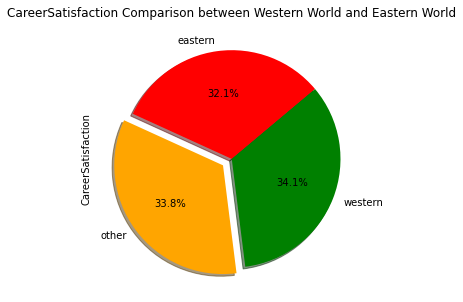

In [340]:
plt.figure(figsize=(12,5))
comparison_graph.groupby('west_or_east').mean()['CareerSatisfaction'].plot(kind='pie',title='CareerSatisfaction Comparison between Western World and Eastern World',autopct='%1.1f%%', startangle=40, shadow = True, colors=['red','orange','green'], explode=my_explode )
comparison.groupby('west_or_east').mean().CareerSatisfaction

west_or_east
eastern    6.619200
other      7.062766
western    7.122752
Name: JobSatisfaction, dtype: float64

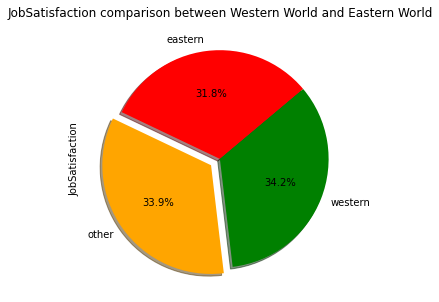

In [341]:
plt.figure(figsize=(12,5))
comparison_graph.groupby('west_or_east').mean()['JobSatisfaction'].plot(kind='pie',title='JobSatisfaction comparison between Western World and Eastern World',autopct='%1.1f%%', startangle=40, shadow = True, colors=['red','orange','green'], explode=my_explode )
comparison.groupby('west_or_east').mean().JobSatisfaction

#### From above data we are clearly notice that average salary, job satisfaction and also career satisfaction is much higher in western world then eastern world though eastern programmers average working hour per week is very high.

Text(0, 0.5, 'Job Satisfaction')

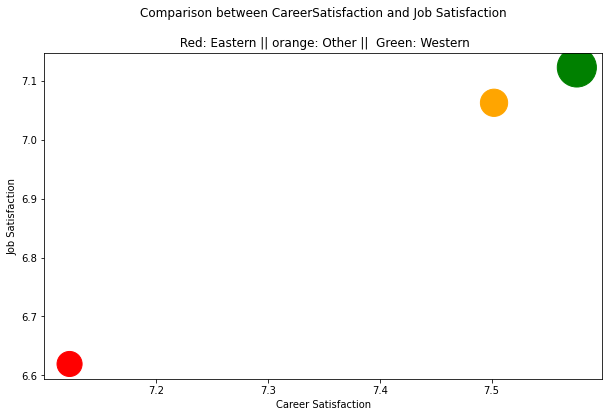

In [342]:
# Comparison of Career and Job Satisfaction between Western and Eastern
plt.figure(figsize=(10,6))
plt.scatter(comparison.groupby('west_or_east').mean().CareerSatisfaction, comparison.groupby('west_or_east').mean().JobSatisfaction, comparison.groupby('west_or_east').mean().Salary/50, c=['red','orange','green'])
plt.title('Comparison between CareerSatisfaction and Job Satisfaction\n\n Red: Eastern || orange: Other ||  Green: Western')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

From all of above data there is a clear visualization of western world and eastern world comparison. Here we see that western programmers green dot have a much higher satisfaction on their job and career, positioned at the right-high-up corner. The dot size indicator their average salary, also the yellow dot size is much larger than the red dot which indicates eastern programmers salary range.

Here we are also see the Job satisfaction vs career satisfaction graph where clearly indicate the western world job satisfaction level is too much high then other.



## Conclusion

* As compared salaries between the eastern and western worlds. We have found that the salary of eastern world programmers is much lower than western world programmers.
* We are able to find out the the value job satisfaction as well as career satisfaction of western world programmer and eastern world programmer. In both case western world programmers have high value then eastern. 
* On the other hand eastern programmers average working hour per week is very high but they are too much underpaid then western programmers.
* So finally after all analysis it is now clear that for getting job satisfaction western world is best for the programmer.  